In [1]:
import numpy as np
from colorama import init, Fore, Back, Style
import seaborn as sns

In [2]:
init()

# Importando Dados

In [3]:
import csv

afrodev = open('./assets/contents/formulario_fofoqueiro.csv')

csvreader = csv.reader(afrodev, delimiter=';')
header=[]
header=next(csvreader)
{i: val for i,val in enumerate(header)}

{0: 'User_id',
 1: 'Carimbo de data/hora',
 2: 'GÃªnero ',
 3: 'Idade',
 4: 'CEP',
 5: 'GÃ\xadria da sua cidade',
 6: 'Estilo de mÃºsica favorita',
 7: 'Cor favorita ',
 8: 'NÃºmero de irmÃ£os ',
 9: 'Qual seu salÃ¡rio dos sonhos ? ',
 10: 'Gosta de programaÃ§Ã£o',
 11: 'Gosta de matemÃ¡tica',
 12: 'Qual sua sÃ©rie favorita?',
 13: 'VocÃª gosta do seu nome?',
 14: 'VocÃª acredita em ET?',
 15: 'Uma data importante',
 16: 'Qual joia do infinito dos vingadores vocÃªs gostaria de possuir ?',
 17: 'O quÃ£o atraente vocÃª se considera de 0 atÃ© 10',
 18: 'O quanto vocÃª gosta de cafÃ©?',
 19: 'VocÃª prefere gato ou cachorro?'}

In [4]:
rows = [row for row in csvreader]
alunos_afrodev = np.array(rows)
afrodev.close()

# Perguntas iniciais

In [5]:
alunos_afrodev.shape

(32, 20)

In [6]:
alunos_afrodev.ndim

2

# Como fazer um head()

In [7]:
alunos_afrodev[:,0:2][:5]

array([['1', '04/10/2021 20:05:11'],
       ['2', '04/10/2021 20:05:15'],
       ['3', '04/10/2021 20:05:25'],
       ['4', '04/10/2021 20:05:32'],
       ['5', '04/10/2021 20:05:34']], dtype='<U26')

# Refazer com regex

In [8]:
idades = np.array([int(s.split(' ')[0]) for s in alunos_afrodev[:,3]])

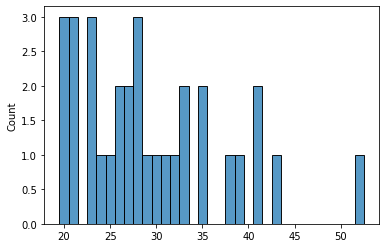

In [9]:
sns.histplot(idades, discrete=True);

In [10]:
idades.mean()

29.46875

# Salário dos sonhos

In [11]:
salario = alunos_afrodev[:,9]

In [28]:
def tratamento_dados(elemento: str) -> float:
    resultado = elemento.replace('k+','000')\
                        .replace('mil','000')\
                        .replace(' ','')\
                        .replace('.','')\
                        .replace('k','000')\
                        .replace('mensais','')\
                        .replace('reais','')\
                        .replace('R$Â','')\
                        .replace(u'\xa0','')\
                        .replace(',','.')
    return float(resultado)

In [34]:
salarios = [tratamento_dados(i) for i in salario]

In [14]:
print(Fore.RED + str(np.max(salarios)))

120000.0


In [30]:
np.min(salarios)

3000.0

In [31]:
np.mean(salarios)

25750.0

# Somatório do salário dos sonhos

In [32]:
np.sum(salarios)

824000.0

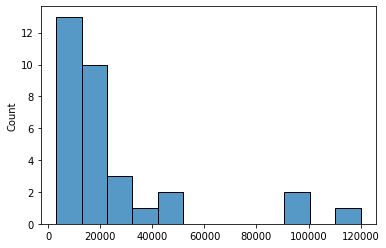

In [18]:
sns.histplot(salarios);

# O quanto você gosta de café?

In [19]:
cafe = [int(i) for i in alunos_afrodev[:,18]]

# Média do café

In [20]:
np.mean(cafe)

6.75

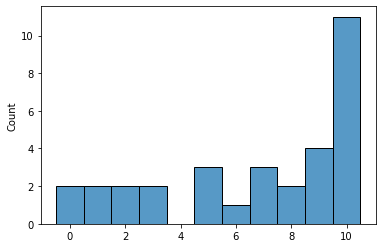

In [21]:
sns.histplot(cafe, discrete=True);

# Sabendo que o salário mínimo é de R$ 1.192,40, e o crescimento anual é de 5%, quantos anos cada pessoa levaria para chegar no salário dos sonhos, levando em consideração a coluna Qual seu salário dos sonhos ?

In [22]:

def encontra_sonho(salarios):

    salario_minimo = (np.ones_like(salarios)) * 1192.4
    resultado = np.array([np.ones_like(salarios)])
    while np.any(salarios > salario_minimo):
        salario_minimo *= (1+.05)
        resultado = np.append(resultado,
                              [salarios > salario_minimo], 
                              axis=0)
    return resultado


In [23]:
np.sum(encontra_sonho(salarios), axis=0)

array([30., 48., 44., 44., 44., 58., 44., 44., 52., 67., 77., 65., 52.,
       52., 37., 95., 37., 52., 63., 44., 73., 58., 52., 30., 58., 58.,
       37., 91., 77., 58., 19., 91.])